In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv(r"C:\Users\rimjh\OneDrive\Desktop\ML Project\cancer prediction\breast_cancer.csv")


In [90]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [71]:
df['diagnosis']=df["diagnosis"].astype('category').cat.codes

In [83]:
df = df.drop('id',axis = 1)

In [85]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int8   
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [115]:
df.drop_duplicates(inplace =True)

In [120]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


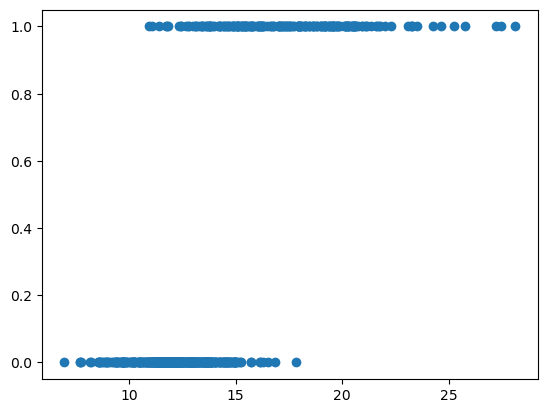

In [147]:
plt.scatter(df['radius_mean'],df['diagnosis'])
plt.show()

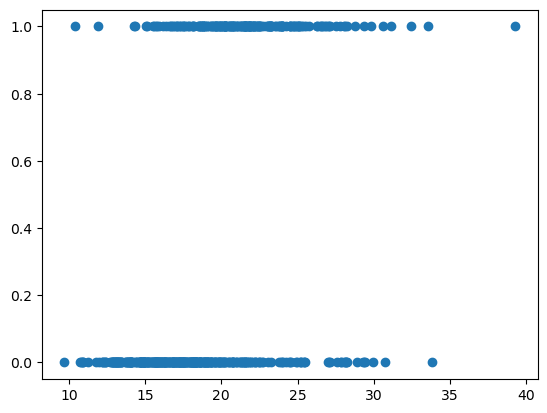

In [149]:
plt.scatter(df['texture_mean'],df['diagnosis'])
plt.show()

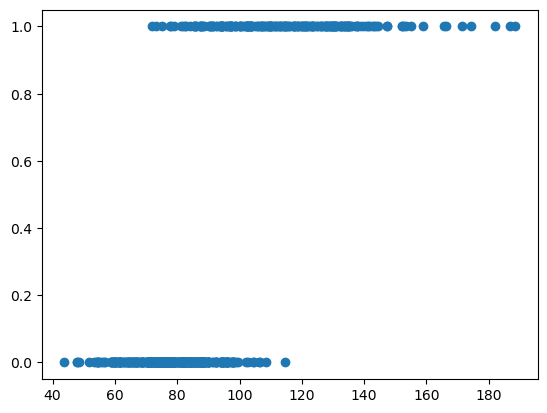

In [151]:
plt.scatter(df['perimeter_mean'],df['diagnosis'])
plt.show()

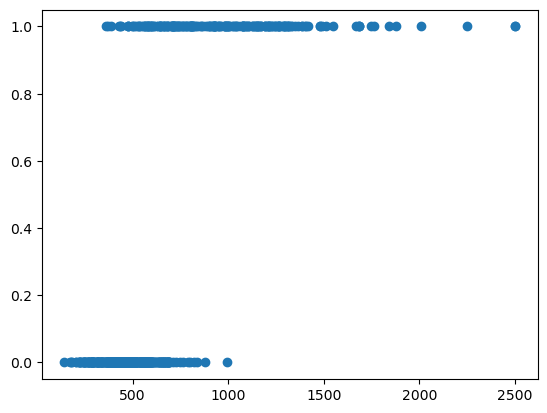

In [153]:
plt.scatter(df['area_mean'],df['diagnosis'])
plt.show()

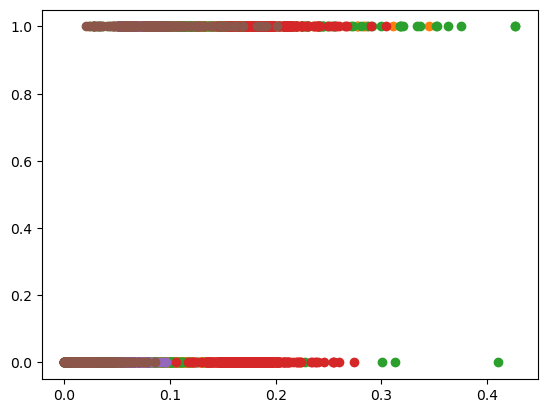

In [155]:
plt.scatter(df['smoothness_mean'],df['diagnosis'])
plt.scatter(df['compactness_mean'],df['diagnosis'])
plt.scatter(df['concavity_mean'],df['diagnosis'])
plt.scatter(df['symmetry_mean'],df['diagnosis'])
plt.scatter(df['fractal_dimension_mean'],df['diagnosis'])
plt.scatter(df['concave points_mean'],df['diagnosis'])
plt.show()

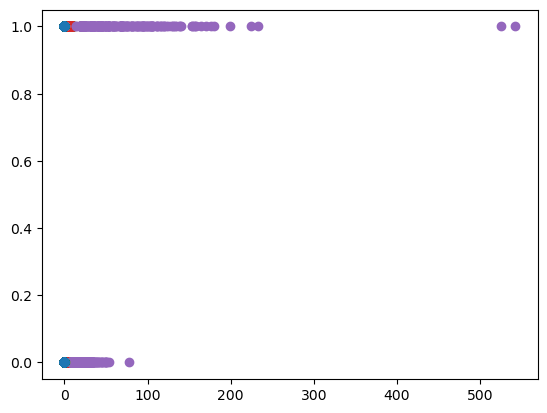

In [143]:
plt.scatter(df['radius_se'],df['diagnosis'])
plt.scatter(df['texture_se'],df['diagnosis'])
plt.scatter(df['perimeter_se'],df['diagnosis'])
plt.scatter(df['perimeter_se'],df['diagnosis'])
plt.scatter(df['area_se'],df['diagnosis'])
plt.scatter(df['smoothness_se'],df['diagnosis'])
plt.scatter(df['compactness_se'],df['diagnosis'])
plt.scatter(df['concavity_se'],df['diagnosis'])
plt.scatter(df['concave points_se'],df['diagnosis'])
plt.scatter(df['symmetry_se'],df['diagnosis'])
plt.scatter(df['symmetry_se'],df['diagnosis'])

plt.show()

In [161]:
x = df.iloc[:,1:]
y = df['diagnosis']

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20,max_features = 2,criterion = 'entropy')

model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=2, n_estimators=20)

In [179]:
y_pred = model.predict(x_test)

In [195]:
# accuracy score
from sklearn.metrics import accuracy_score,recall_score,f1_score

print(f"accuracy score: {accuracy_score(y_pred,y_test)}")
print(f"F1_score: {f1_score(y_pred,y_test)}")

accuracy score: 0.956140350877193
F1_score: 0.9397590361445783


In [203]:
import pickle
path = "C:\\Users\\rimjh\\OneDrive\\Desktop\\ML Project\\cancer prediction\\model.pkl"
with open(path,'wb') as file:
    pickle.dump(model,file)